In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("new_weed_tweets_with_bert.csv")

# Display the first few rows
df.head()

,Key word,Post Date,Username,Account id,account page,Post content,Post id,# of replies,# of retweets,# of likes,...,# of views,tweet link,# of follower,# of following,Geo location,County,State,Cleaned_Content,VADER_Sentiment_Score,BERT_Sentiment
0,weed,2020-12-31 07:01:21,Tanya Martin,geekgoodgirl,https://twitter.com/geekgoodgirl,Breakfast. Late. Need cash 🤑 and weed. https:/...,1.344418e+18,0.0,0.0,0.0,...,0.0,https://twitter.com/Olympics/status/1344418323...,884.0,785.0,"Glenn, California",Glenn,California,breakfast late need cash and weed,0.0000,3 stars
1,weed,2020-12-31 06:59:42,Alice Moon,thealicemoon,https://twitter.com/thealicemoon,@JasonRBradwell @ThatChristinaG Cannabis brand...,1.344418e+18,0.0,0.0,0.0,...,0.0,https://twitter.com/Olympics/status/1344417909...,6557.0,1508.0,"Los Angeles, California",Los Angeles,California,jasonrbradwell thatchristinag cannabis brands ...,-0.6249,1 star
2,weed,2020-12-31 06:52:30,Will Cunningham,wcunningham11,https://twitter.com/wcunningham11,@RyanAFournier But are you going to take it ba...,1.344416e+18,0.0,0.0,0.0,...,0.0,https://twitter.com/Olympics/status/1344416096...,16.0,169.0,"Shasta, California",Shasta,California,ryanafournier but are you going to take it bac...,0.3724,3 stars
3,weed,2020-12-31 06:35:00,420,420,https://twitter.com/420,I'm old enough to remember when the headline w...,1.344412e+18,0.0,0.0,0.0,...,0.0,https://twitter.com/Olympics/status/1344411692...,112764.0,1034.0,"San Francisco, California",San Francisco,California,im old enough to remember when the headline wa...,0.8516,5 stars
4,weed,2020-12-31 06:11:10,Krystal 🦋,krystalbydesign,https://twitter.com/krystalbydesign,Being a stoner is great bc not only does weed ...,1.344406e+18,0.0,3.0,21.0,...,0.0,https://twitter.com/Olympics/status/1344405697...,3006.0,998.0,"San Francisco, California",San Francisco,California,being a stoner is great bc not only does weed ...,0.8020,5 stars


In [ ]:
# Extract numeric values from BERT_Sentiment column
df['BERT_Sentiment_Score'] = df['BERT_Sentiment'].str.extract('(\d+)').astype(float)

# Convert VADER_Sentiment_Score to float for aggregation
df['VADER_Sentiment_Score'] = df['VADER_Sentiment_Score'].astype(float)

# Group by County and calculate the average sentiment scores
grouped = df.groupby('County').agg({
    'VADER_Sentiment_Score': 'mean',
    'BERT_Sentiment_Score': 'mean'
}).reset_index()

grouped.head()

,County,VADER_Sentiment_Score,BERT_Sentiment_Score
0,Alameda,0.045125,2.654485
1,Alpine,0.092600,2.797872
2,Amador,0.001347,2.657895
3,Butte,-0.017366,2.526882
4,Calaveras,0.141208,2.601852


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10360 entries, 0 to 10359
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Key word               10359 non-null  object 
 1   Post Date              10359 non-null  object 
 2   Username               10359 non-null  object 
 3   Account id             10359 non-null  object 
 4   account page           10359 non-null  object 
 5   Post content           10359 non-null  object 
 6   Post id                10359 non-null  float64
 7   # of replies           10359 non-null  float64
 8   # of retweets          10359 non-null  float64
 9   # of likes             10359 non-null  float64
 10  # of citations         10359 non-null  float64
 11  # of views             10359 non-null  float64
 12  tweet link             10359 non-null  object 
 13  # of follower          10359 non-null  float64
 14  # of following         10359 non-null  float64
 15  Ge

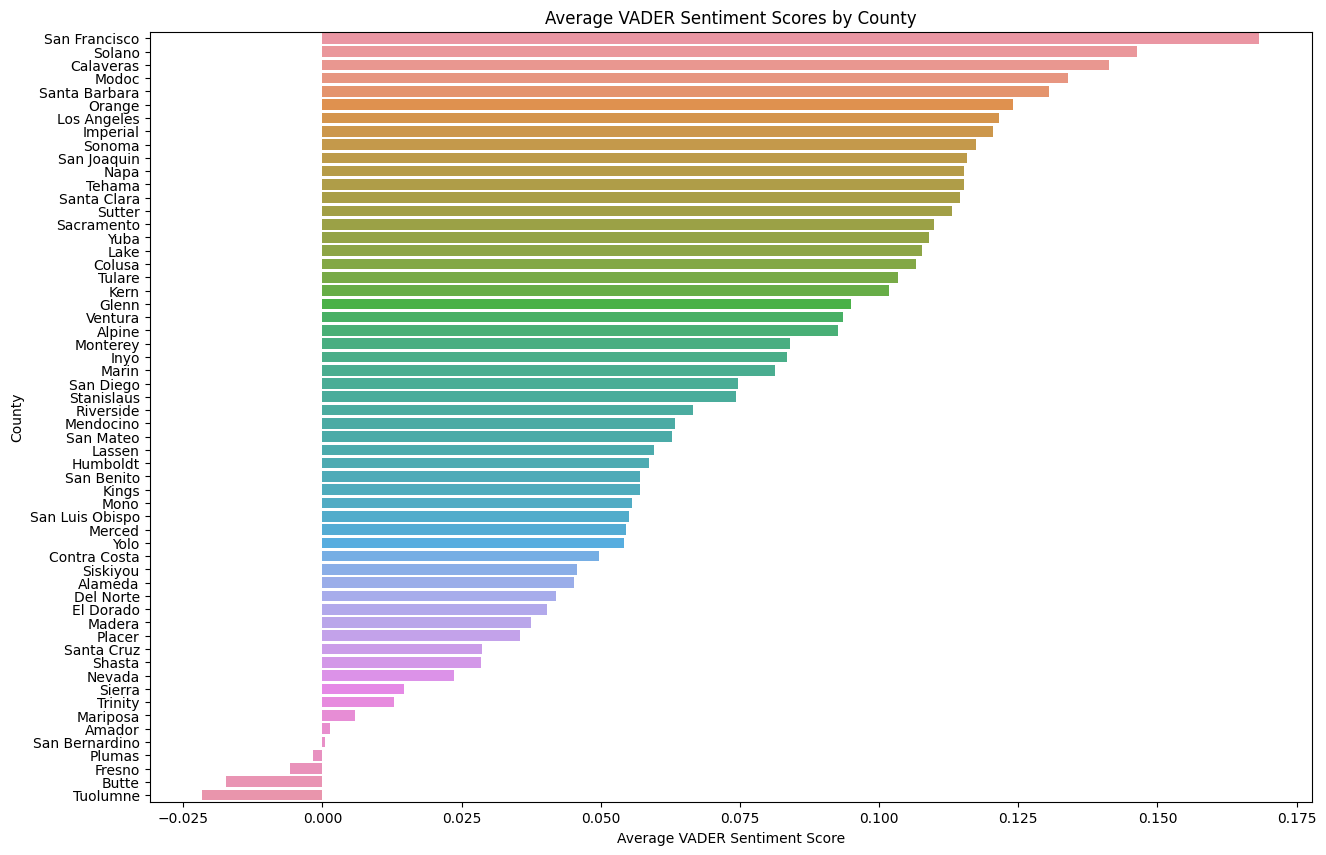

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize=(15, 10))

# Bar plot for VADER sentiment scores by county
sns.barplot(data=grouped.sort_values(by="VADER_Sentiment_Score", ascending=False), x="VADER_Sentiment_Score", y="County")

plt.title("Average VADER Sentiment Scores by County")
plt.xlabel("Average VADER Sentiment Score")
plt.ylabel("County")
plt.show()


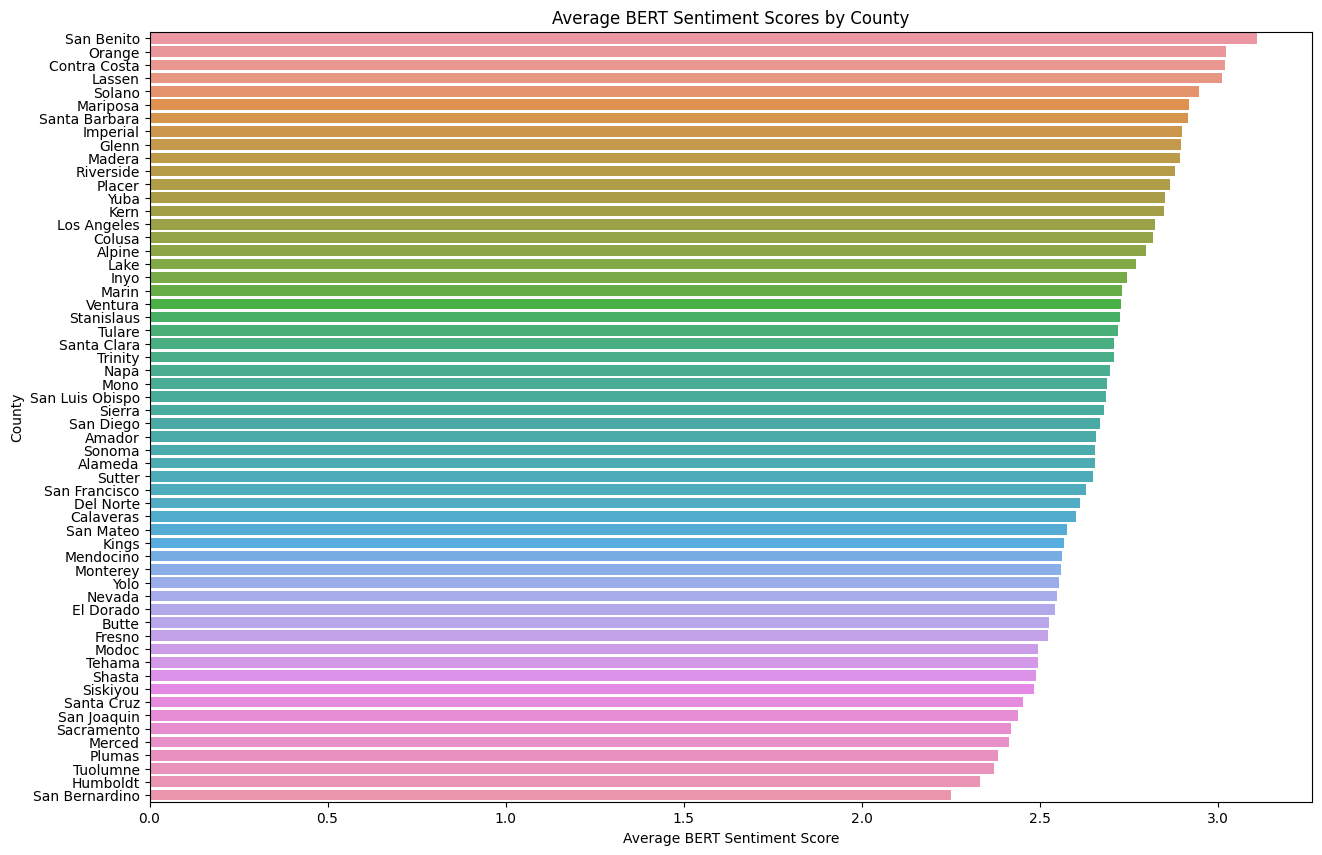

In [ ]:
# Set figure size
plt.figure(figsize=(15, 10))

# Bar plot for BERT sentiment scores by county
sns.barplot(data=grouped.sort_values(by="BERT_Sentiment_Score", ascending=False), x="BERT_Sentiment_Score", y="County")

plt.title("Average BERT Sentiment Scores by County")
plt.xlabel("Average BERT Sentiment Score")
plt.ylabel("County")
plt.show()


Weighted Population

In [ ]:
# Load the population data
pop_df = pd.read_csv("cali_population_2018_2022.csv")

# Clean the county names by removing the word "County"
pop_df['CTYNAME'] = pop_df['CTYNAME'].str.replace(" County", "")

# Calculate the average 4-year population for each county
pop_df['Avg_4yr_Population'] = pop_df[['POPESTIMATE2018', 'POPESTIMATE2019', 'ESTIMATESBASE2020', 'POPESTIMATE2021']].mean(axis=1)

pop_df.head()

,CTYNAME,POPESTIMATE2018,POPESTIMATE2019,ESTIMATESBASE2020,POPESTIMATE2021,POPESTIMATE2022,Avg_4yr_Population
0,Alameda,1666596,1668412,1682331,1643837,1628997,1665294.00
1,Alpine,1081,1113,1201,1235,1190,1157.50
2,Amador,39349,39693,40474,41144,41412,40165.00
3,Butte,230330,218726,211631,206190,207303,216719.25
4,Calaveras,45747,46119,45285,46219,46563,45842.50


In [ ]:
# Merge the sentiment scores with the population data
merged_df = pd.merge(grouped, pop_df, left_on='County', right_on='CTYNAME', how='left')

# Calculate weighted sentiment scores
merged_df['Weighted_VADER'] = merged_df['VADER_Sentiment_Score'] * merged_df['Avg_4yr_Population']
merged_df['Weighted_BERT'] = merged_df['BERT_Sentiment_Score'] * merged_df['Avg_4yr_Population']

merged_df.head()

,County,VADER_Sentiment_Score,BERT_Sentiment_Score,CTYNAME,POPESTIMATE2018,POPESTIMATE2019,ESTIMATESBASE2020,POPESTIMATE2021,POPESTIMATE2022,Avg_4yr_Population,Weighted_VADER,Weighted_BERT
0,Alameda,0.045125,2.654485,Alameda,1666596,1668412,1682331,1643837,1628997,1665294.00,75146.806690,4.420498e+06
1,Alpine,0.092600,2.797872,Alpine,1081,1113,1201,1235,1190,1157.50,107.184500,3.238537e+03
2,Amador,0.001347,2.657895,Amador,39349,39693,40474,41144,41412,40165.00,54.117053,1.067543e+05
3,Butte,-0.017366,2.526882,Butte,230330,218726,211631,206190,207303,216719.25,-3763.457944,5.476239e+05
4,Calaveras,0.141208,2.601852,Calaveras,45747,46119,45285,46219,46563,45842.50,6473.343021,1.192754e+05


In [ ]:
merged_df.to_csv('weighted_score_by_county.csv')

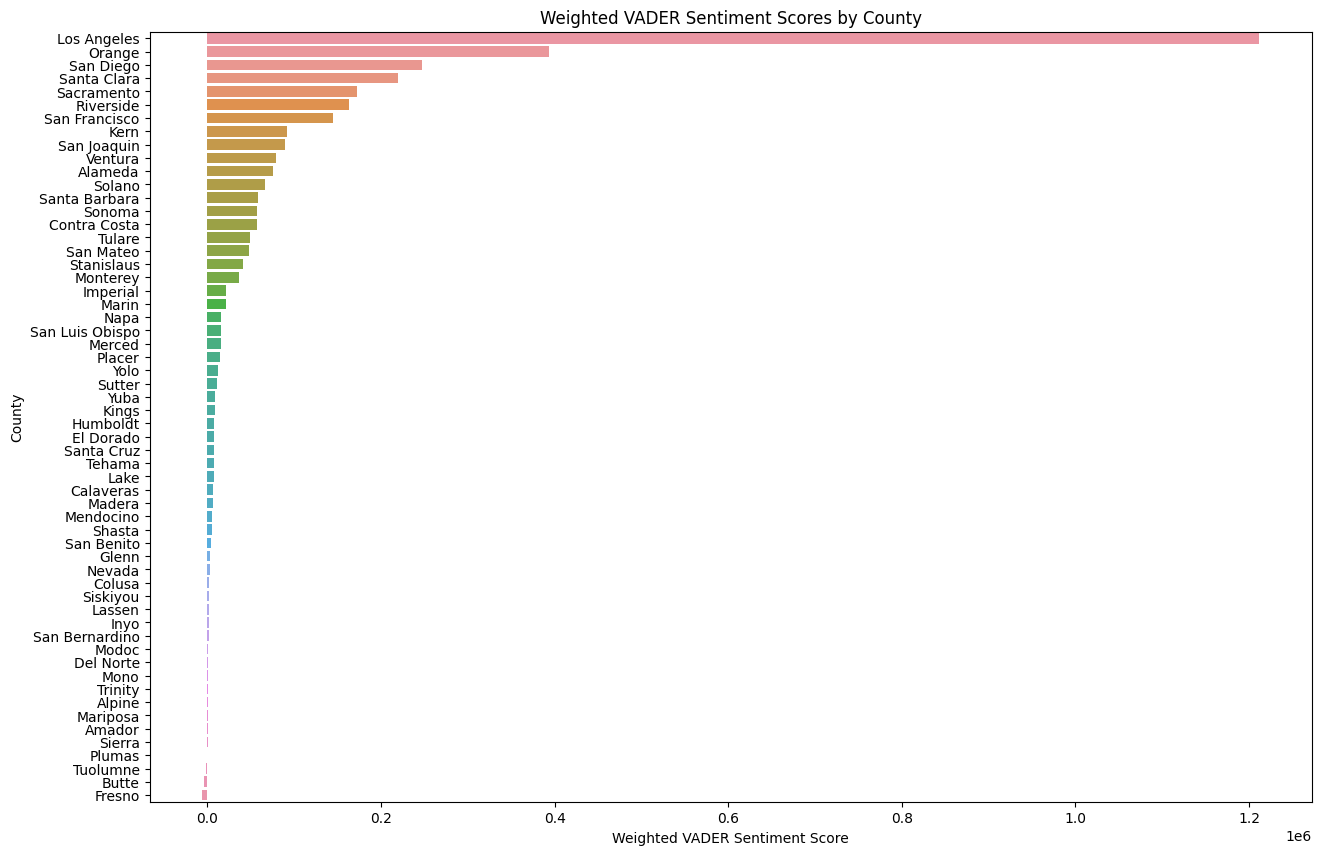

In [ ]:
# Set figure size
plt.figure(figsize=(15, 10))

# Bar plot for weighted VADER sentiment scores by county
sns.barplot(data=merged_df.sort_values(by="Weighted_VADER", ascending=False), x="Weighted_VADER", y="County")

plt.title("Weighted VADER Sentiment Scores by County")
plt.xlabel("Weighted VADER Sentiment Score")
plt.ylabel("County")
plt.show()


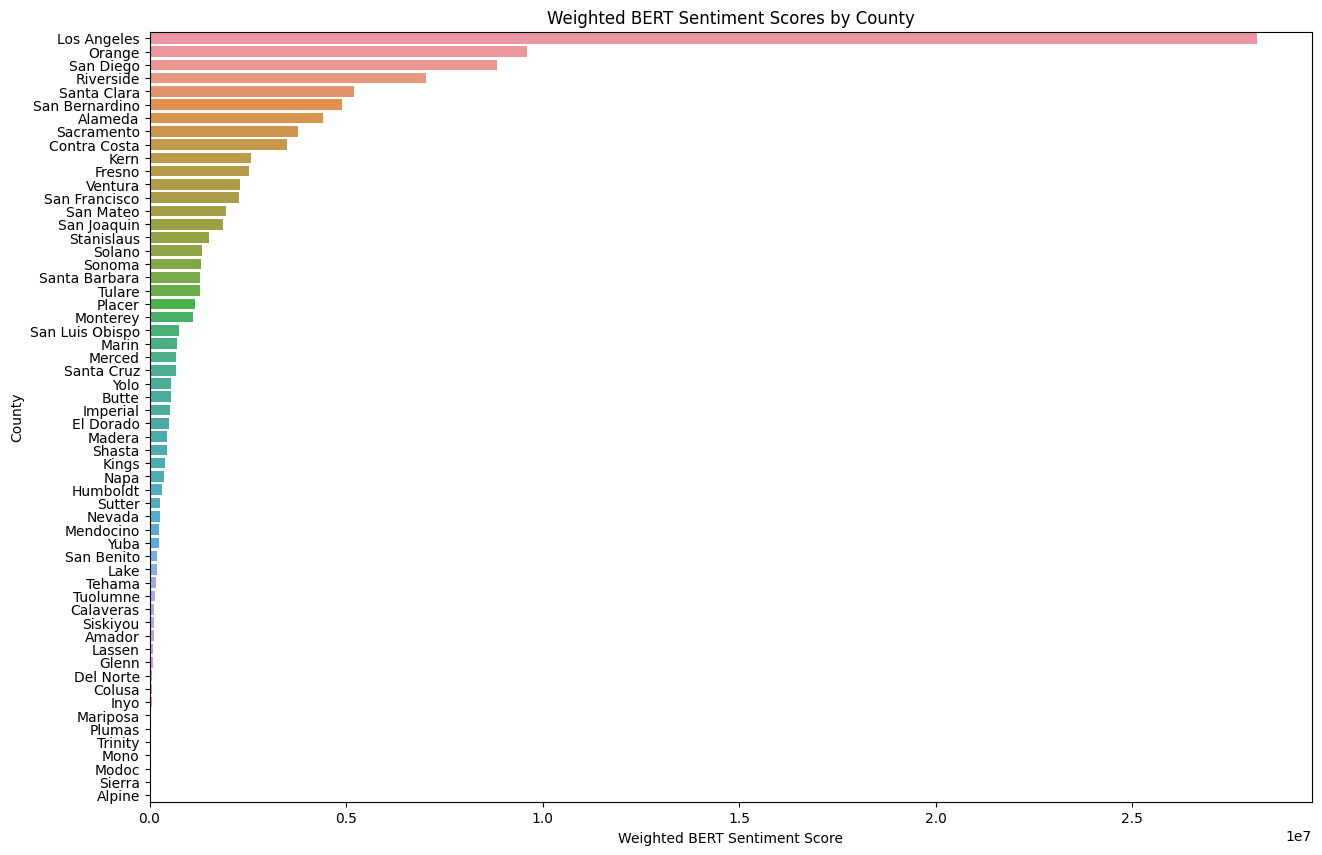

In [ ]:
# Set figure size
plt.figure(figsize=(15, 10))

# Bar plot for weighted BERT sentiment scores by county
sns.barplot(data=merged_df.sort_values(by="Weighted_BERT", ascending=False), x="Weighted_BERT", y="County")

plt.title("Weighted BERT Sentiment Scores by County")
plt.xlabel("Weighted BERT Sentiment Score")
plt.ylabel("County")
plt.show()